## Observations and Insights 

•	The distribution between drug regimen and sex is fairly even, which makes the data more reliable.  
•	The results for the capomulin drug regimen seem promising with a strong negative correlation over time. Although the graph was just for one of the mice, it would be good to see average tumor volume by timepoint for all mice on that drug regimen.
•	Looking at the average tumor volume compared to weight can mean a couple things. The drug may not work as well on mice that weight more, or the tumor might have just been larger to begin with due to the weight of the mice. This just shows the average, not where it started or ended. I think looking at the percentage of tumor volume change by weight would be helpful.  
•	Looking at the boxplot comparisons, it seems like the capomulin an ramicane drug are working the best with the lowest final tumor volumes. However, if you look at the overall average volume, those were the two lowest to start with. Again I think looking at a percentage change would be more helpful.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data["Mouse ID"])

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep = "first")]
duplicates_df["Mouse ID"]


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep = "first")]
duplicates_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(["Mouse ID", "Timepoint"], keep = "first")
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"])

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group_df = clean_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_clean = regimen_group_df["Tumor Volume (mm3)"].mean()
median_clean = regimen_group_df["Tumor Volume (mm3)"].median()
variance_clean = regimen_group_df["Tumor Volume (mm3)"].var()
stddev_clean = regimen_group_df["Tumor Volume (mm3)"].std()
sem_clean = regimen_group_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
statistic_summary_df = pd.DataFrame({"Mean": mean_clean, 
    "Median": median_clean, 
    "Variance": variance_clean, 
    "Std Deviation": stddev_clean, 
    "SEM": sem_clean})
statistic_summary_df.round(2)

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
aggregate_regimen = clean_data.groupby(["Drug Regimen"]).aggregate({"Tumor Volume (mm3)": ["mean", "median", "var","std","sem"]})
aggregate_regimen.round(2)


Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Text(0, 0.5, 'Timepoint')

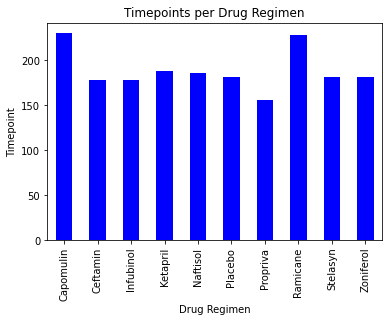

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_data.groupby(["Drug Regimen"]).aggregate({"Timepoint": ["count"]})
plot_barchart = timepoints.plot(kind="bar",y = "Timepoint", title="Timepoints per Drug Regimen", color="b", legend=False)
plot_barchart.set_xlabel("Drug Regimen")
plot_barchart.set_ylabel("Timepoint")


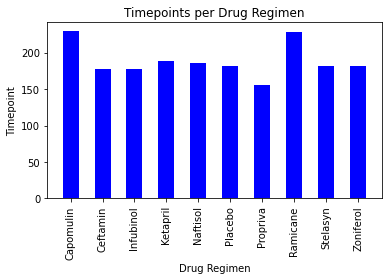

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_py = clean_data.groupby(["Drug Regimen"])['Timepoint'].count().reset_index()
x_axis = np.arange(len(timepoints_py))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(5.5,4))
plt.bar(x_axis,timepoints_py["Timepoint"], color="blue", width=0.5)
plt.xticks(tick_locations, timepoints_py["Drug Regimen"], rotation="vertical")
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.tight_layout()


Text(0, 0.5, '')

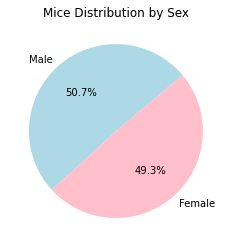

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data["Sex"].value_counts()

# gender
colors=["lightblue", "pink"]
plot_piechart = gender.plot(kind="pie", title="Mice Distribution by Sex", autopct="%1.1f%%", startangle=40, colors=colors)
plt.ylabel("")


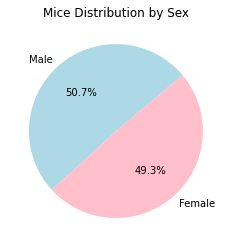

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_py = clean_data["Sex"].value_counts()
colors=["lightblue", "pink"]
plt.pie(gender_py, autopct="%1.1f%%", labels=gender_py.index, startangle=40, colors=colors)
plt.title("Mice Distribution by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest = clean_data.groupby(["Mouse ID"], sort=False)["Timepoint"].max()
latest_df = pd.DataFrame(latest, columns =["Timepoint"])

# Print to see how it looks
# latest_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(latest_df, clean_data, how="left", on=["Mouse ID","Timepoint"])
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,22.050126,1
1,s185,45,Capomulin,Female,3,17,23.343598,1
2,x401,45,Capomulin,Female,16,15,28.484033,0
3,m601,45,Capomulin,Male,22,17,28.430964,1
4,g791,45,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,5,Stelasyn,Female,21,28,45.934712,0
245,z435,10,Propriva,Female,12,26,48.710661,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for later for plot labels
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create merged dataframe for promising drugs
capomulin = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin"), :]
ramicane = merge_df.loc[(merge_df["Drug Regimen"] == "Ramicane"), :]
infubinol = merge_df.loc[(merge_df["Drug Regimen"] == "Infubinol"), :]
ceftamin = merge_df.loc[(merge_df["Drug Regimen"] == "Ceftamin"), :]
promising_drugs_df = capomulin.append([ramicane, infubinol, ceftamin])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = promising_drugs_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")

# Locate and subset the rows which contain mice on each drug and get the tumor volumes
tumor_capomulin = capomulin["Tumor Volume (mm3)"]
tumor_ramicane = ramicane["Tumor Volume (mm3)"]
tumor_infubinol = infubinol["Tumor Volume (mm3)"]
tumor_ceftamin = ceftamin["Tumor Volume (mm3)"]


# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


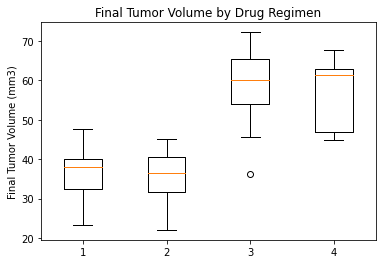

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumors = [tumor_capomulin, tumor_ramicane, tumor_infubinol, tumor_ceftamin[::2]]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.boxplot(tumors)
plt.show()

## Line and Scatter Plots

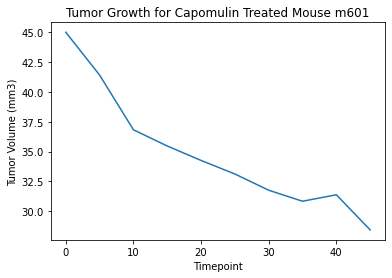

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_data.loc[(clean_data["Mouse ID"] == "m601"), :]
y_axis = capomulin_mouse["Tumor Volume (mm3)"]
x_axis = capomulin_mouse["Timepoint"]
plt.title("Tumor Growth for Capomulin Treated Mouse m601")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis)
plt.show()


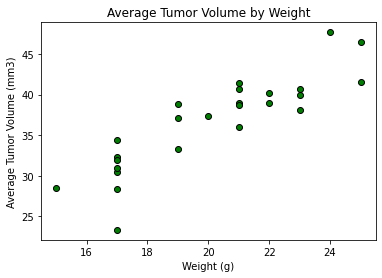

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Pull data for mice given Capomulin
capomulin_avg_df = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin"), ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# Create average volume dataframe
average_volume_df = capomulin_avg_df.groupby(["Mouse ID"]).mean().reset_index()

# Format and create scatter plot
weight = average_volume_df["Weight (g)"]
avg_volume = average_volume_df["Tumor Volume (mm3)"]
plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(weight, avg_volume, marker="o", facecolors="green", edgecolors="black")
plt.show()


## Correlation and Regression

The correlation coefficient between weight and average tumor volume for the Capomulin regimen is 0.88


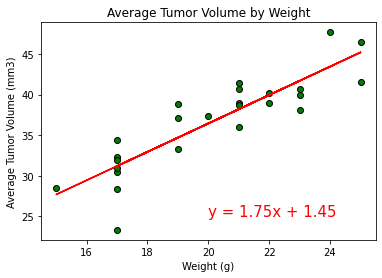

In [18]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(weight,avg_volume)[0],2)}")

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(weight, avg_volume, marker="o", facecolors="green", edgecolors="black")
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.show()